# Tarea Final Herramientas Computacionales
  ##### Alexandra Serrano Mendoza - 2201453

En primera instancia vamos importar las librerias que vamos a utilizar: Numpy, Matplotlib, Pandas y Scipy.

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy as sci
from scipy.optimize import curve_fit

## 1. Lectura de archivos
Ahora leemos los archivos que queremos combinar por separado:

In [163]:
data1 = pd.read_csv("Global_active_power.csv", delimiter= ",")
data2 = pd.read_csv("Global_intensity.csv", delimiter= ",")
data3 = pd.read_csv("Global_reactive_power.csv", delimiter= ",")
data4 = pd.read_csv("Voltage.csv", delimiter= ",")

## 2. Concatenación de Archivos
Comenzamos a concatenar los archivos en dos pasos (juntar los datos de data 1 con data 2 y los datos de data 3 con data 4, para luego combinar los dos grupos de datos de forma ordenada):

In [164]:
data12 = pd.merge(data1,data2)
data12

,Datetime,Global_active_power,Global_intensity
0,2010-01-01 00:00:00,1.790,7.4
1,2010-01-01 00:01:00,1.780,7.4
2,2010-01-01 00:02:00,1.780,7.4
3,2010-01-01 00:03:00,1.746,7.2
4,2010-01-01 00:04:00,1.686,7.0
...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0
457391,2010-11-26 20:59:00,0.944,4.0
457392,2010-11-26 21:00:00,0.938,3.8
457393,2010-11-26 21:01:00,0.934,3.8


In [165]:
data34 = pd.merge(data3,data4)
data34

,Datetime,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,0.236,240.65
1,2010-01-01 00:01:00,0.234,240.07
2,2010-01-01 00:02:00,0.234,240.15
3,2010-01-01 00:03:00,0.186,240.26
4,2010-01-01 00:04:00,0.102,240.12
...,...,...,...
457390,2010-11-26 20:58:00,0.000,240.43
457391,2010-11-26 20:59:00,0.000,240.00
457392,2010-11-26 21:00:00,0.000,239.82
457393,2010-11-26 21:01:00,0.000,239.70


### Archivo de Datos Final

In [166]:
datafinal = pd.merge(data12,data34)
datafinal

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


In [167]:
datafinal.to_csv('data.csv')

## 3. Ajuste de Datetime

Ahora queremos reducir la cantidad de datos para tenerlos en escala de dias, esto para generar un nuevo conjunto de datos que considere promedios diarios de la tabla de datos por minuto inicial.

In [168]:
data = pd.read_csv('data.csv', parse_dates = ['Datetime'], index_col = ['Datetime'])
data

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01 00:00:00,0,1.790,7.4,0.236,240.65
2010-01-01 00:01:00,1,1.780,7.4,0.234,240.07
2010-01-01 00:02:00,2,1.780,7.4,0.234,240.15
2010-01-01 00:03:00,3,1.746,7.2,0.186,240.26
2010-01-01 00:04:00,4,1.686,7.0,0.102,240.12
...,...,...,...,...,...
2010-11-26 20:58:00,457390,0.946,4.0,0.000,240.43
2010-11-26 20:59:00,457391,0.944,4.0,0.000,240.00
2010-11-26 21:00:00,457392,0.938,3.8,0.000,239.82


### Datos por día

In [169]:
data_days = data.resample('D').mean()
data_days

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01,719.5,0.850175,3.537083,0.114817,242.565722
2010-01-02,42229.5,1.176235,4.857778,0.086656,243.631743
2010-01-03,82547.5,0.901894,3.757778,0.090331,241.822778
2010-01-04,125160.5,1.171833,4.879028,0.100322,241.754160
2010-01-05,168359.5,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...,...
2010-12-07,272036.5,0.770538,3.397222,0.198550,240.218646
2010-12-08,316675.5,0.367846,1.623750,0.117429,240.794931
2010-12-09,354089.5,1.119508,4.755694,0.139832,241.619722


### Datos por mes
Ahora queremos reducir la cantidad de datos para tenerlos en escala de meses, esto para generar un nuevo conjunto de datos que considere promedios mensuales de la tabla de datos por minuto inicial.

In [170]:
data_month = data.resample('M').mean()
data_month

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-31,100170.129182,1.300640,5.430332,0.125182,242.338522
2010-02-28,128339.585175,1.157539,4.836624,0.109467,242.002101
2010-03-31,151173.561849,1.170015,4.920399,0.136368,241.475284
2010-04-30,177796.948276,1.036334,4.363496,0.129557,241.442527
2010-05-31,205370.206741,1.075957,4.551504,0.127221,241.296151
2010-06-30,233408.971551,0.975306,4.170282,0.145525,240.888985
2010-07-31,262055.585639,0.778947,3.337202,0.138093,240.965167
2010-08-31,280754.886724,0.929452,3.954423,0.130815,241.422944
2010-09-30,303424.528462,0.997541,4.223837,0.127700,241.267517


## 4. Modelo de regresión entre los conjuntos de datos

In [171]:
def lineal(x,a,b):
    return a*x + b
    
def fit(func,xdata,ydata,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    E = np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Coeficients : {}".format(popt))
    print("Sigma_Coeficients : {}".format(pcov))
    print("Error on fit  ={}".format(E))
    return #popt, np.sqrt(np.diag(pcov))


### Global Active Power = A1(Global Intensity) + B1 
#### Relación 1

En esta subsección, se extraeran los parametros de ajuste en la relación de intensidad y potencia global activa, haciendo uso del ajuste de curva.

In [172]:
#Relación mensual
popt_month, pcov_month = curve_fit(lineal, data_month["Global_active_power"], data_month["Global_intensity"])
popt_month

array([3.98900025, 0.2466916 ])

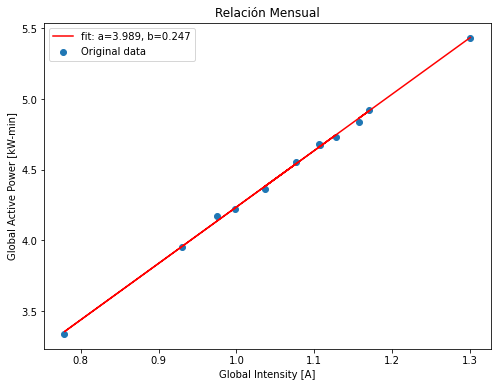

In [173]:
plt.figure(figsize=(8,6))
plt.plot(data_month["Global_active_power"], lineal(data_month["Global_active_power"], *popt_month), 'r-', label = 'fit: a=%5.3f, b=%5.3f' % 
tuple(popt_month))
plt.scatter(data_month["Global_active_power"], data_month["Global_intensity"], label = "Original data")
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.title("Relación Mensual")
plt.legend()
plt.show()

In [174]:
# Relación minuto
popt, pcov_min = curve_fit(lineal, data["Global_active_power"], data["Global_intensity"])
popt

array([4.18950958, 0.03335361])

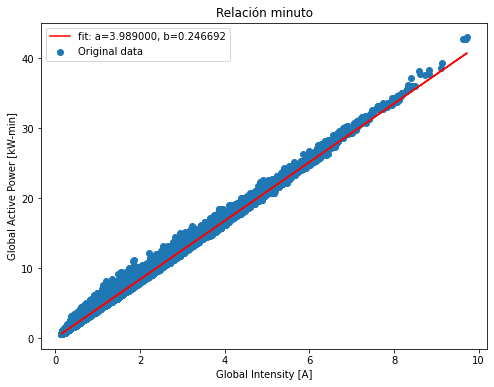

In [175]:
plt.figure(figsize=(8,6))
plt.plot(data["Global_active_power"], lineal(data["Global_active_power"], *popt), 'r-', label = 'fit: a=%6.6f, b=%6.6f' % tuple(popt_month))
plt.scatter(data["Global_active_power"], data["Global_intensity"], label = "Original data")
plt.title("Relación minuto")
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.legend()
plt.show()

In [176]:
data_days = data_days.dropna()

In [177]:
#Relación diaria
popt_days, pcov_days = curve_fit(lineal, data_days["Global_active_power"], data_days["Global_intensity"])
popt

array([4.18950958, 0.03335361])

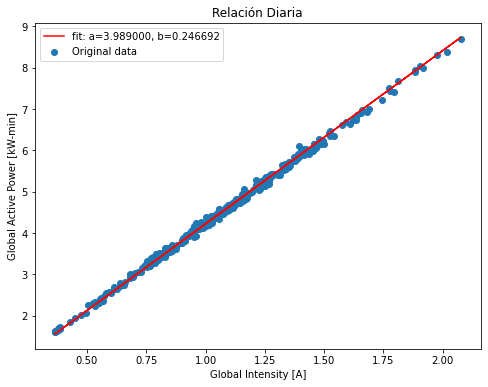

In [178]:
plt.figure(figsize=(8,6))
plt.plot(data_days["Global_active_power"], lineal(data_days["Global_active_power"], *popt), 'r-', label = 'fit: a=%6.6f, b=%6.6f' % tuple(popt_month))
plt.scatter(data_days["Global_active_power"], data_days["Global_intensity"], label = "Original data")
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.title("Relación Diaria")
plt.legend()
plt.show()

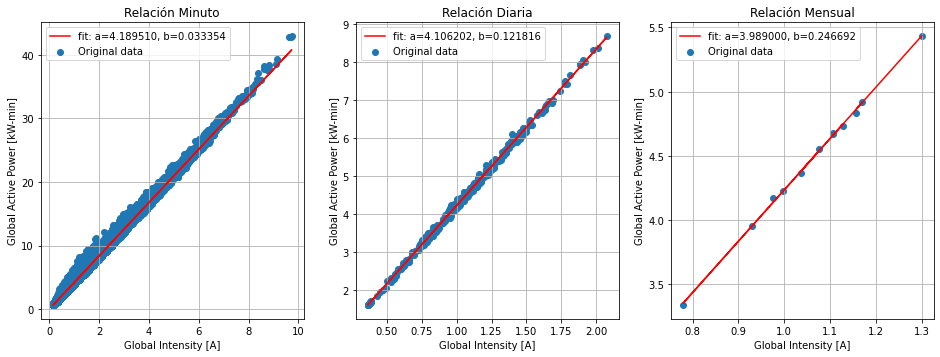

In [179]:
plt.figure(figsize=(16,12))
plt.subplot(231)
plt.plot(data["Global_active_power"], lineal(data["Global_active_power"], *popt), 'r-',label='fit: a=%6.6f, b=%6.6f' % tuple(popt))
plt.scatter(data["Global_active_power"],data["Global_intensity"],label="Original data")
plt.legend()
plt.grid()
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.title("Relación Minuto")


plt.subplot(232)
plt.plot(data_days["Global_active_power"], lineal(data_days["Global_active_power"], *popt_days), 'r-',label='fit: a=%6.6f, b=%6.6f' % tuple(popt_days))
plt.scatter(data_days["Global_active_power"],data_days["Global_intensity"],label="Original data")
plt.legend()
plt.grid()
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.title("Relación Diaria")

plt.subplot(233)
plt.plot(data_month["Global_active_power"], lineal(data_month["Global_active_power"], *popt_month), 'r-',label='fit: a=%6.6f, b=%6.6f' % tuple(popt_month))
plt.scatter(data_month["Global_active_power"],data_month["Global_intensity"],label="Original data")
plt.xlabel('Global Intensity [A]')
plt.ylabel('Global Active Power [kW-min]')
plt.title("Relación Mensual")

plt.legend()
plt.grid()

plt.show()

In [180]:
print("Análisis datos por minutos:")
fit(lineal,data["Global_intensity"],data["Global_active_power"],4)
print("Para el análisis por días:")
fit(lineal,data_days["Global_intensity"],data_days["Global_active_power"],4)
print("Para el análisis por meses:")
fit(lineal,data_month["Global_intensity"],data_month["Global_active_power"],4)

Análisis datos por minutos:
Coeficients : [ 0.238 -0.005]
Sigma_Coeficients : [0.     0.0001]
Error on fit  =0.04925528576163536
Para el análisis por días:
Coeficients : [ 0.2431 -0.0275]
Sigma_Coeficients : [0.0006 0.0028]
Error on fit  =0.015226449414553379
Para el análisis por meses:
Coeficients : [ 0.2504 -0.0607]
Sigma_Coeficients : [0.0026 0.0115]
Error on fit  =0.004128565630216453


### Global Active Power = A2(Voltage) + B2
#### Relación 2
En esta subsección, se extraeran los parametros de ajuste en la relación de intensidad global y voltaje, haciendo uso del ajuste de curva.

In [181]:
#Ajuste de todos los datos
popt2, pcov2 = curve_fit(lineal, data["Voltage"], data["Global_active_power"])
popt2

array([-0.13586092, 33.87352423])

In [182]:
# Ajuste promedio mensual
popt_month2, pcov_month2 = curve_fit(lineal, data_month["Voltage"], data_month["Global_active_power"])
data_days2 = data_days.dropna()
popt_month2


array([  0.17281052, -40.67097826])

In [183]:
#Ajuste promedios diario
popt_days2, pcov_days2 = curve_fit(lineal, data_days["Voltage"], data_days["Global_active_power"])
popt_days2

array([ 0.0296603 , -6.10166907])

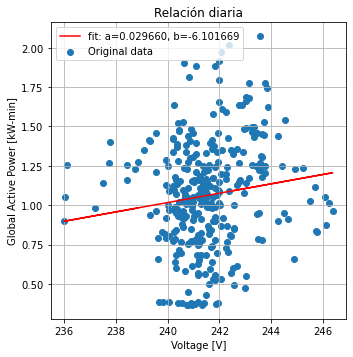

In [184]:
plt.figure(figsize=(18,12))
plt.subplot(231) 
plt.plot(data_days["Voltage"], lineal(data_days["Voltage"], *popt_days2), 'r-',label='fit: a=%6.6f, b=%6.6f' % tuple(popt_days2))
plt.scatter(data_days["Voltage"], data_days["Global_active_power"],label="Original data")
plt.title("Relación diaria")
plt.xlabel('Voltage [V]')
plt.ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()

C:\Users\Alexa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


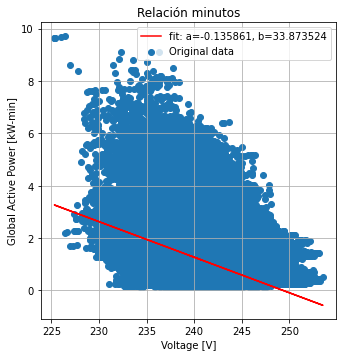

In [185]:
plt.figure(figsize=(18,12))
plt.subplot(232)
plt.plot(data["Voltage"], lineal(data["Voltage"], *popt2), 'r-',label='fit: a=%6.6f, b=%6.6f' % tuple(popt2))
plt.scatter(data["Voltage"], data["Global_active_power"], label="Original data")
plt.title('Relación minutos')
plt.xlabel('Voltage [V]')
plt.ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()

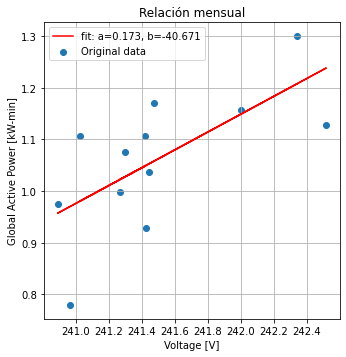

In [186]:
plt.figure(figsize=(18,12))
plt.subplot(233)
plt.plot(data_month["Voltage"], lineal(data_month["Voltage"], *popt_month2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month2))
plt.scatter(data_month["Voltage"],data_month["Global_active_power"],label="Original data")
plt.title('Relación mensual')
plt.xlabel('Voltage [V]')
plt.ylabel('Global Active Power [kW-min]')
plt.legend()
plt.grid()

In [187]:
print("Análisis datos por dia:")
fit(lineal,data_days["Voltage"],data_days["Global_active_power"],4)
print("Análisis datos por meses:")
fit(lineal, data_month["Voltage"],data_month["Global_active_power"],4)
print("Análisis datos por minuto:")
fit(lineal, data["Voltage"], data["Global_active_power"],5)

Análisis datos por dia:
Coeficients : [ 0.0297 -6.1017]
Sigma_Coeficients : [0.0124 2.9894]
Error on fit  =0.34141653538652267
Análisis datos por meses:
Coeficients : [  0.1728 -40.671 ]
Sigma_Coeficients : [ 0.0599 14.4783]
Error on fit  =0.09455670674396957
Análisis datos por minuto:
Coeficients : [-0.13586 33.87352]
Sigma_Coeficients : [0.00044 0.10632]
Error on fit  =0.848793541593315


### Global Active Power = A31(Global Intensity) + A32(Voltage) + B3
#### Relación 3

En esta relación, se toman dos variables(R3).

In [188]:
def r(X, a, b, c):  
    x,y = X
    return(a*x+b*y+c)

In [189]:
popt_month_3, pcov_month_3 = curve_fit(r, (data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"])
days_popt_3, days_pcov_3 = curve_fit(r, (data_days["Global_intensity"], data_days["Voltage"]),data_days["Global_active_power"])
popt_3, pcov_3 = curve_fit(r, (data["Global_intensity"], data["Voltage"]),data["Global_active_power"])

Como es una regresión en R3, hay que fijar los valores del meshgrid que ajustará cada conjunto de datos a partir de una malla que relaciona las variables independientes con la dependiente.

In [190]:
#Valores del meshgrid para el ajuste
month_Global_intensity = [np.min(data_month["Global_intensity"]),np.max(data_month["Global_intensity"]),len(data_month["Global_intensity"])]
month_Voltage = [np.min(data_month["Voltage"]),np.max(data_month["Voltage"]),len(data_month["Voltage"])]

days_Global_intensity = [np.min(data_days["Global_intensity"]),np.max(data_days["Global_intensity"]),300]
days_Voltage = [np.min(data_days["Voltage"]),np.max(data_days["Voltage"]),300]

Global_intensity = [np.min(data["Global_intensity"]),np.max(data["Global_intensity"]),12]
Voltage = [np.min(data["Voltage"]),np.max(data["Voltage"]),12]

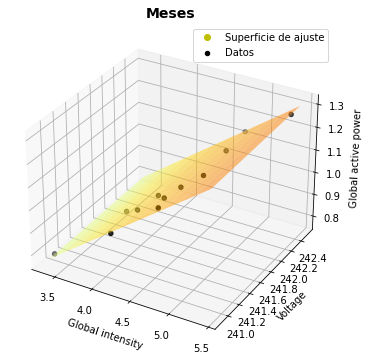

In [210]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x=np.linspace(*month_Global_intensity)
y=np.linspace(*month_Voltage)             
xx, yy =np.meshgrid(x,y)
z= r((xx,yy),*popt_month_3)          
#Ajuste de datos en meses
scatter = ax.scatter3D(data_month["Global_intensity"],data_month["Voltage"],data_month["Global_active_power"],color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.5,cmap='Wistia') #Regresión
plt.title("Meses",fontsize=14,fontweight="bold")
plt.xlabel("Global intensity")
plt.ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o') 
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)
plt.show()

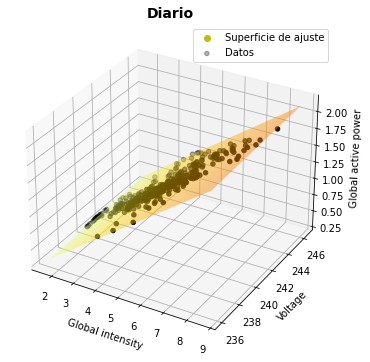

In [211]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x2=np.linspace(*days_Global_intensity)
y2=np.linspace(*days_Voltage)
xx2, yy2 =np.meshgrid(x2,y2)
z2= r((xx2,yy2),*days_popt_3)
ax.scatter3D(data_days["Global_intensity"],data_days["Voltage"],data_days["Global_active_power"],color = 'black')
ax.plot_surface(xx2,yy2,z2,alpha= 0.5,cmap='Wistia')
ax.set_title("Diario",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o')
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)
plt.show()

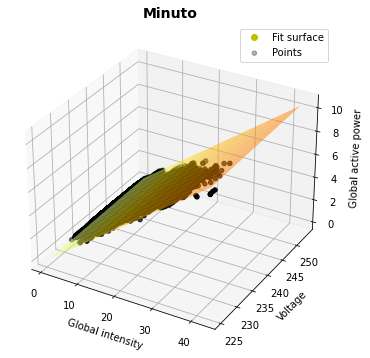

In [209]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x1=np.linspace(*Global_intensity)
y1=np.linspace(*Voltage)
xx1, yy1 =np.meshgrid(x1,y1)
z1= r((xx1,yy1),*popt_3)
ax.scatter3D(data["Global_intensity"],data["Voltage"],data["Global_active_power"], color = 'black')
ax.plot_surface(xx1,yy1,z1,alpha= 0.5,cmap='Wistia')
ax.set_title("Minuto",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o')
ax.legend([legends,scatter], ['Fit surface','Points'], numpoints = 1)
plt.show()

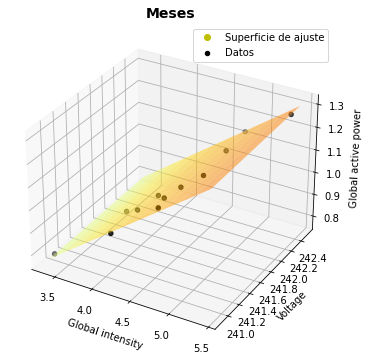

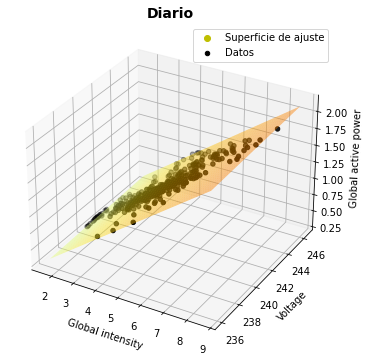

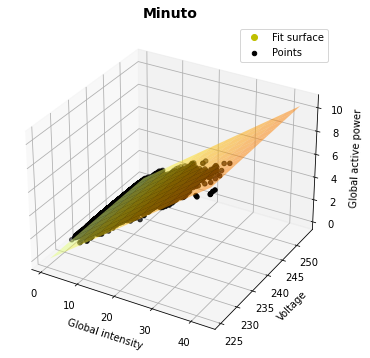

In [213]:
plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x=np.linspace(*month_Global_intensity)
y=np.linspace(*month_Voltage)             
xx, yy =np.meshgrid(x,y)
z= r((xx,yy),*popt_month_3)          
#Ajuste de datos en meses
scatter = ax.scatter3D(data_month["Global_intensity"],data_month["Voltage"],data_month["Global_active_power"],color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.5,cmap='Wistia') #Regresión
plt.title("Meses",fontsize=14,fontweight="bold")
plt.xlabel("Global intensity")
plt.ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o') 
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)

plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x2=np.linspace(*days_Global_intensity)
y2=np.linspace(*days_Voltage)
xx2, yy2 =np.meshgrid(x2,y2)
z2= r((xx2,yy2),*days_popt_3)
ax.scatter3D(data_days["Global_intensity"],data_days["Voltage"],data_days["Global_active_power"],color = 'black')
ax.plot_surface(xx2,yy2,z2,alpha= 0.5,cmap='Wistia')
ax.set_title("Diario",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o')
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)

plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
x1=np.linspace(*Global_intensity)
y1=np.linspace(*Voltage)
xx1, yy1 =np.meshgrid(x1,y1)
z1= r((xx1,yy1),*popt_3)
ax.scatter3D(data["Global_intensity"],data["Voltage"],data["Global_active_power"], color = 'black')
ax.plot_surface(xx1,yy1,z1,alpha= 0.5,cmap='Wistia')
ax.set_title("Minuto",fontsize=14,fontweight="bold")
ax.set_xlabel("Global intensity")
ax.set_ylabel("Voltage")
ax.set_zlabel("Global active power")
legends = mpl.lines.Line2D([0],[0], linestyle="none", color='y', marker = 'o')
ax.legend([legends,scatter], ['Fit surface','Points'], numpoints = 1)

plt.show()

In [220]:
print("Análisis datos por mes:")
fit(r,(data_month["Global_intensity"], data_month["Voltage"]),data_month["Global_active_power"],4)
print("Análisis datos por dia:")
fit(r,(data_days["Global_intensity"], data_days["Voltage"]),data_days["Global_active_power"],4)
print("Analisis datos por minuto")
fit(r,(data["Global_intensity"], data["Voltage"]),data["Global_active_power"],4)


Análisis datos por mes:
Coeficients : [ 0.2452  0.0081 -1.9891]
Sigma_Coeficients : [0.0024 0.0025 0.5894]
Error on fit  =0.005115479149132411
Análisis datos por dia:
Coeficients : [ 0.2424  0.0062 -1.5153]
Sigma_Coeficients : [0.0005 0.0004 0.1051]
Error on fit  =0.013699690119496786
Analisis datos por minuto
Coeficients : [ 0.2395  0.0047 -1.1392]
Sigma_Coeficients : [0.     0.     0.0067]
Error on fit  =0.04834810285784731


## 5. Conclusiones

El error presentado en cada ajuste y para cada conjunto de datos es el siguiente:
    

|  | Minutos | Días | Meses |
| --- | --- | --- | --- |
| Rel 1 | 0.049 | 0.015 | 0.004 |
| Rel 2 | 0.849 | 0.341 | 0.095 |
| Rel 3 | 0.048 | 0.014 | 0.005 |

Con esto, podemos evidenciar que el mejor ajuste para los datos, tienden a ser los arreglos de datos en meses, puesto que el error en cada relación es mucho mas bajo en comparación a los arreglos de datos de minutos y dias. 

El ajuste menos eficiente para los datos suele ser el de los minutos, puesto que el error de estos datos es mayor en comparación al error de los demás conjuntos de datos.

En cuanto a las relaciones, podemos notar que la relación menos optima sería la relación 2, puesto que el error es mayor que las demás relaciones, las cuales son casi equivalentes en cuanto al error.